In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
df=pd.read_csv('D:\\Desktop4\\DataFiles\\GitHub_Data\\Projects_work\\abalone.csv')


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
label_calls=['Sex']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df[label_calls] = df[label_calls].apply(lambda x : label.fit_transform(x))

In [8]:
df.describe() 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

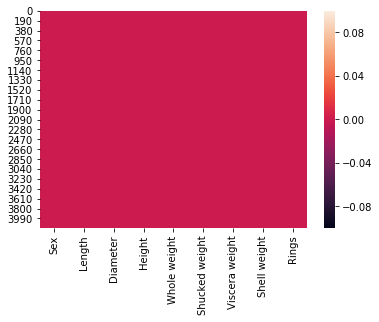

In [10]:
sns.heatmap(df.isnull())

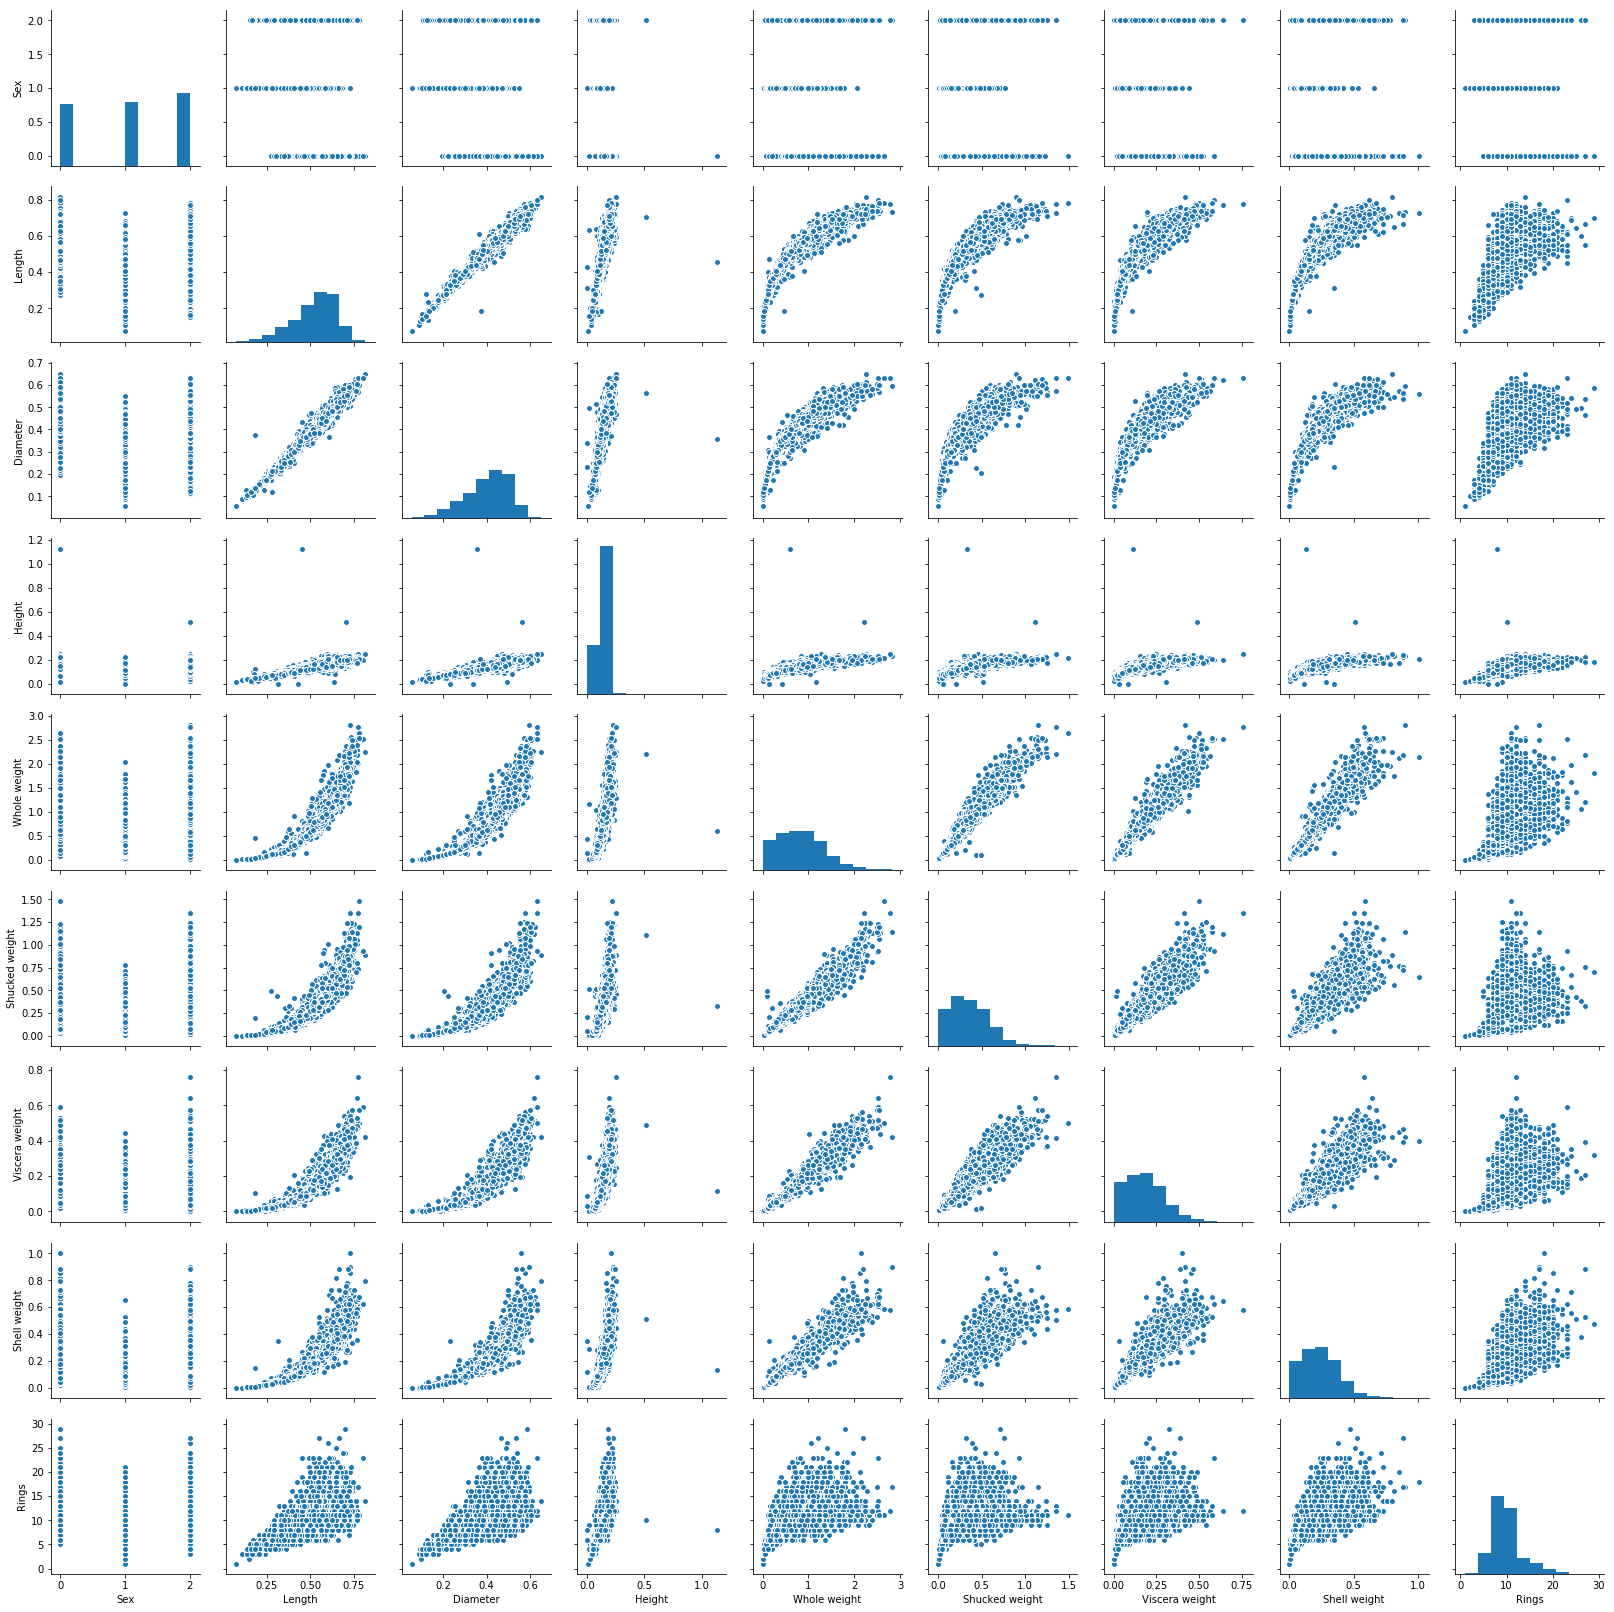

In [11]:
sns.pairplot(df)


In [12]:
#del df["Sex"]

In [35]:
#x=df.values.astype(np.float)
y=df.Rings.values

In [36]:
x=df.iloc[:,0:7]

In [37]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200


In [38]:
x.shape

(4177, 7)

In [39]:
y=df.iloc[:,-1]

In [40]:
y=df.Rings.values.astype(np.float)

In [41]:
x.shape

(4177, 7)

In [42]:
y.shape

(4177,)

In [43]:
train_x,test_x,train_y,test_y = train_test_split( x, y, test_size=0.33, random_state=42)

In [44]:
train_x.shape

(2798, 7)

In [45]:
test_x.shape

(1379, 7)

In [46]:
test_y.shape

(1379,)

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lr.coef_

array([ -0.31811604,  12.20911106,  11.00252028,  10.17182656,
       -21.74816688, -10.14840709,   7.89392675])

In [28]:
lr.intercept_

2.95170963404116

In [29]:
lr.score(train_x,train_y)

0.5338369690495441

In [30]:
pred=lr.predict(test_x)
print("Predict result price ",pred)

Predict result price  [11.64921202  9.9968907  14.06362955 ...  8.07952912  7.96837778
  7.53396384]


In [31]:
print("actual Price",test_y)

actual Price [ 9.  8. 16. ...  8.  6.  5.]


# Error part

In [32]:
print("Mean Absolutes Error",mean_absolute_error(test_y,pred))

Mean Absolutes Error 1.6318220224904239


In [33]:
print("Mean Squarr Error",mean_squared_error(test_y,pred))

Mean Squarr Error 4.948527547938055


In [34]:
print(" Root Mean Squarr Error",np.sqrt(mean_squared_error(test_y,pred)))

 Root Mean Squarr Error 2.224528612524023
